In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Core configuration & plotting settings
from qspectro2d.config import *  # provides CONFIG and mpl settings
from qspectro2d.core.atomic_system.system_class import AtomicSystem
from qutip import *

from thesis_paths import FIGURES_TESTS_DIR
name_plot_folder = "test_N_atoms_geometry"
custom_dir = FIGURES_TESTS_DIR / name_plot_folder

from plotstyle import COLORS, MARKERS, LINE_STYLES, FONT_SIZE, LATEX_DOC_WIDTH, set_size, save_fig, latex_available, format_sci_notation, init_style
init_style()

### Helper printing utilities
def show_basic_info(title: str, system):
    print(f"\n=== {title} ===")
    print(f"n_atoms: {system.n_atoms}")
    print("frequencies (cm^-1):", system.frequencies_cm)
    print("dip moments:", system.dip_moments)
    print("dipole operator in eigenbasis:", system.dipole_op.tidyup().full().real)
    if system.n_atoms <= 12:
        print("Hamiltonian matrix (fs^-1 units / ħ incorporated):")
        print(system.hamiltonian.tidyup().full().real)

In [2]:
from qspectro2d.utils.constants import convert_cm_to_fs, convert_fs_to_cm
x = 40
print(f"{x} cm^-1 = {convert_fs_to_cm(x) / 1e4:.4f} fs^-1")

40 cm^-1 = 21.2348 fs^-1


In [3]:
# Nyquist-based guidance for time step and window
from qspectro2d.utils.constants import convert_cm_to_fs, convert_fs_to_cm

# Target spectral feature (wavenumber)
nu_cm       = 16000.0  # cm^-1
omega_fs    = convert_cm_to_fs(nu_cm)  # fs^-1 (angular frequency units used in code)

# Nyquist criterion: need sampling rate >= 2*f_max
# In angular-frequency units, ω_N ≈ π/Δt, so Δt_max ≈ π / ω_max
import numpy as np

Delta_t_max = np.pi / omega_fs                  # fs (theoretical upper bound)
Delta_t_rec = 0.5 * Delta_t_max                 # fs (safer choice ~×2 oversampling)

# Optional: desired spectral resolution (in cm^-1) sets total time window T ≈ 2π/Δω
# Using angular resolution Δω = convert_fs_to_cm(Δν)/1e4
Delta_nu_cm   = 50.0                            # choose desired resolution in cm^-1
Delta_omega   = convert_cm_to_fs(Delta_nu_cm)  # fs^-1
T_window_rec  = 2 * np.pi / Delta_omega         # fs

print(
    f"Target: {nu_cm:.0f} cm^-1 -> ω = {omega_fs:.5f} fs^-1\n"
    f"Δt_max (Nyquist) ≈ π/ω = {Delta_t_max:.4f} fs\n"
    f"Recommended Δt ≈ {Delta_t_rec:.4f} fs (×2 oversample)\n"
    f"For Δν ≈ {Delta_nu_cm:.0f} cm^-1, recommended T ≈ {T_window_rec:.1f} fs"
)

Target: 16000 cm^-1 -> ω = 3.01392 fs^-1
Δt_max (Nyquist) ≈ π/ω = 1.0424 fs
Recommended Δt ≈ 0.5212 fs (×2 oversample)
For Δν ≈ 50 cm^-1, recommended T ≈ 667.1 fs


In [4]:
### 1. Single atom system
single = AtomicSystem(n_atoms=1, frequencies_cm=[16000.0], dip_moments=[1.0])
show_basic_info("Single Atom", single)
basis_states = single.eigenstates[1]
#print("eigenvectors", basis_states)
#U = Qobj(np.column_stack([e.full() for e in basis_states]))
#A = single.deph_op_i(1)

#A_new = U.dag() * A * U
#print("dephasing operator in fock basis vs eigenbasis:", A, A_new)


=== Single Atom ===
n_atoms: 1
frequencies (cm^-1): [16000.0]
dip moments: [1.0]
dipole operator in eigenbasis: [[0. 1.]
 [1. 0.]]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.         0.        ]
 [0.         3.01391833]]


In [5]:
### 2. Dimer with coupling
# Simple two-site system with modest detuning and coupling
dimer1 = AtomicSystem(
    n_atoms=2,
    max_excitation=1,  # single-excitation manifold
    frequencies_cm=[16360.0, 15640.0],
    dip_moments=[1.0, 1.2],
    coupling_cm=300.0,)
show_basic_info("Dimer (2 atoms {1})", dimer1)

### 2. Dimer with coupling
# Simple two-site system with modest detuning and coupling
dimer2 = AtomicSystem(
    n_atoms=2,
    max_excitation=2,  # double-excitation manifold
    frequencies_cm=[16360.0, 15640.0],
    dip_moments=[1.0, 1.2],
    coupling_cm=300.0,
)
show_basic_info("Dimer (2 atoms {2})", dimer2)

basis_states = dimer2.eigenstates[1]
print("eigenvectors", basis_states)
U = Qobj(np.column_stack([e.full() for e in basis_states]))
A = dimer2.deph_op_i(1)

A_new = U * A * U.dag() # transform back into the site basis
print("dephasing operator in fock basis vs eigenbasis:", A, A_new)


=== Dimer (2 atoms {1}) ===
n_atoms: 2
frequencies (cm^-1): [16360.0, 15640.0]
dip moments: [1.0, 1.2]
dipole operator in eigenbasis: [[0.  1.  1.2]
 [1.  0.  0. ]
 [1.2 0.  0. ]]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.         0.         0.        ]
 [0.         3.08173149 0.05651097]
 [0.         0.05651097 2.94610517]]

=== Dimer (2 atoms {2}) ===
n_atoms: 2
frequencies (cm^-1): [16360.0, 15640.0]
dip moments: [1.0, 1.2]
dipole operator in eigenbasis: [[0.  1.  1.2 0. ]
 [1.  0.  0.  1.2]
 [1.2 0.  0.  1. ]
 [0.  1.2 1.  0. ]]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.         0.         0.         0.        ]
 [0.         3.08173149 0.05651097 0.        ]
 [0.         0.05651097 2.94610517 0.        ]
 [0.         0.         0.         6.02783666]]
eigenvectors [Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
 Qobj da

In [4]:
from qspectro2d.utils.constants import HBAR, convert_cm_to_fs, convert_fs_to_cm

convert_cm_to_fs(300.0)

0.056510968652773205

In [5]:
dimer1.hamiltonian

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.         0.         0.        ]
 [0.         3.08173149 0.05651097]
 [0.         0.05651097 2.94610517]]

In [6]:
dimer2.lowering_op

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0.  1.  1.2 0. ]
 [0.  0.  0.  1.2]
 [0.  0.  0.  1. ]
 [0.  0.  0.  0. ]]

In [10]:
l_eig=dimer2.to_eigenbasis(dimer2.lowering_op)
l_eig

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.         0.78790063 1.34878189 0.        ]
 [0.         0.         0.         0.53176126]
 [0.         0.         0.         1.46875116]
 [0.         0.         0.         0.        ]]

In [12]:
l_eig.dag() + l_eig

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.         0.78790063 1.34878189 0.        ]
 [0.78790063 0.         0.         0.53176126]
 [1.34878189 0.         0.         1.46875116]
 [0.         0.53176126 1.46875116 0.        ]]

In [13]:
dip=dimer2.dipole_op
dip_eig = dimer2.to_eigenbasis(dip)
dip_eig

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.         0.78790063 1.34878189 0.        ]
 [0.78790063 0.         0.         0.53176126]
 [1.34878189 0.         0.         1.46875116]
 [0.         0.53176126 1.46875116 0.        ]]

In [7]:
dip = dimer2.dipole_op
print("dipole operator:", dip)

num_op = dimer2.number_op
print("number operator:", num_op.tidyup())

# Test the new mathematical mapping functions
from qspectro2d.core.atomic_system.system_class import pair_to_index, index_to_pair
N = dimer2.n_atoms
if dimer2.max_excitation == 2:
    print("Double-excitation mappings:")
    for i in range(1, N):
        for j in range(i + 1, N + 1):
            idx = pair_to_index(i, j, N)
            i_back, j_back = index_to_pair(idx, N)
            print(f"  |{i},{j}> -> index {idx} -> back to ({i_back},{j_back})")

dipole operator: Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.  1.  1.2 0. ]
 [1.  0.  0.  1.2]
 [1.2 0.  0.  1. ]
 [0.  1.2 1.  0. ]]
number operator: Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]]
Double-excitation mappings:
  |1,2> -> index 4 -> back to (1,2)


In [8]:
### 3 atoms
three_at = AtomicSystem(n_atoms=3,
                        frequencies_cm=[16000.0, 16500.0, 17000.0],
                        dip_moments=[1.0, 1.0, 1.0],
                        max_excitation=2,  # single-excitation manifold
                        coupling_cm=200.0)
show_basic_info("Three Atoms", three_at)
dip = three_at.dipole_op
print("dipole operator:", dip)

num_op = three_at.number_op
print("number operator:", num_op.tidyup())

# Test mathematical mapping functions for 3 atoms (no double excitations in this case)
print("System dimension:", three_at.dimension)
print("Max excitation level:", three_at.max_excitation)

# Test the new mathematical mapping functions
from qspectro2d.core.atomic_system.system_class import pair_to_index, index_to_pair
N = three_at.n_atoms
if three_at.max_excitation == 2:
    print("Double-excitation mappings:")
    for i in range(1, N):
        for j in range(i + 1, N + 1):
            idx = pair_to_index(i, j, N)
            i_back, j_back = index_to_pair(idx, N)
            print(f"  |{i},{j}> -> index {idx} -> back to ({i_back},{j_back})")

coupling_op = three_at.coupling_op
coupling_op

num_op = three_at.number_op
num_op.tidyup()


=== Three Atoms ===
n_atoms: 3
frequencies (cm^-1): [16000.0, 16500.0, 17000.0]
dip moments: [1.0, 1.0, 1.0]
dipole operator in eigenbasis: [[0. 1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.01391833e+00 3.76739791e-02 4.70924739e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.76739791e-02 3.10810328e+00 3.76739791e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.70924739e-03 3.76739791e-02 3.20228822e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.12202160e+00 3.76739791e-02 4.70924739e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.76739791e-02 6.21620655

Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]

In [9]:
i_atom = 1
j_atom = 2
idx = pair_to_index(i_atom, j_atom, three_at.n_atoms)
Li = three_at.basis[i_atom] * three_at.basis[idx].dag()
op_ij_i = Li + Li.dag()
print("Li:", op_ij_i)
Lj = three_at.basis[j_atom] * three_at.basis[idx].dag()
op_ij_j = Lj + Lj.dag()
print("Lj:", op_ij_j)
decay_op = op_ij_i + op_ij_j
print("decay_op:", decay_op)

Li: Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Lj: Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
decay_op: Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [10]:
three_at.to_eigenbasis(num_op.tidyup())

Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.52400151e-16  4.64018478e-17
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.52400151e-16  1.00000000e+00  3.37543040e-17
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.64018478e-17  3.37543040e-17  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.00000000e+00 -3.24741677e-16  1.43040068e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.24741677e-16  2.00000000e+00 -3.00727773e-18]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.43040068e-16 -3.00727773e-18  2.00000000e+00]]

In [11]:
three_at = AtomicSystem(n_atoms=3,
                        frequencies_cm=[16000.0, 16500.0, 17000.0],
                        dip_moments=[1.0, 1.0, 1.0],
                        max_excitation=1,  # single-excitation manifold
                        coupling_cm=200.0)

coupling_op = three_at.coupling_op
coupling_op


Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.         0.         0.         0.        ]
 [0.         0.         0.03767398 0.00470925]
 [0.         0.03767398 0.         0.03767398]
 [0.         0.00470925 0.03767398 0.        ]]

In [12]:
### 3. 4-atom system (double-excitation manifold) with dipole-dipole coupling
four_at = AtomicSystem(
    n_atoms=4,
    frequencies_cm=[16000 + 5*i for i in range(4)],
    dip_moments=[1.0]*4,
    coupling_cm=300.0,
    max_excitation=2,
)
basis_states = four_at.eigenstates[1]
print("eigenvectors", basis_states)
U = Qobj(np.column_stack([e.full() for e in basis_states]))
A = four_at.deph_op_i(1)

A_new = U.dag() * A * U
print("dephasing operator in fock basis vs eigenbasis:", A, A_new)

dip = four_at.dipole_op
print("dipole operator:", dip)

num_op = four_at.number_op
print("number operator:", num_op.tidyup())

# Test the new mathematical mapping functions for 4 atoms
from qspectro2d.core.atomic_system.system_class import pair_to_index, index_to_pair
N = four_at.n_atoms
if four_at.max_excitation == 2:
    print("Double-excitation mappings:")
    for i in range(1, N):
        for j in range(i + 1, N + 1):
            idx = pair_to_index(i, j, N)
            i_back, j_back = index_to_pair(idx, N)
            print(f"  |{i},{j}> -> index {idx} -> back to ({i_back},{j_back})")

coupling_op = four_at.coupling_op
coupling_op

eigenvectors [Quantum object: dims=[[11], [1]], shape=(11, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[11], [1]], shape=(11, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.        ]
  [ 0.37056432]
  [-0.61535711]
  [ 0.60175821]
  [-0.34914862]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]
 Quantum object: dims=[[11], [1]], shape=(11, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.        ]
  [ 0.5916787 ]
  [-0.3736004 ]
  [-0.40492266]
  [ 0.58853776]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]
 Quantum object: dims=[[11], [1]], shape=(11, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.        ]
  [ 0.60560865]
  [ 0.37204544]
  [-0.34738401]
  [-0.6116737 ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]
 Quantum object: dims=[[11], [

Quantum object: dims=[[11], [11]], shape=(11, 11), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.05651097 0.00706387 0.002093   0.
  0.         0.         0.         0.         0.        ]
 [0.         0.05651097 0.         0.05651097 0.00706387 0.
  0.         0.         0.         0.         0.        ]
 [0.         0.00706387 0.05651097 0.         0.05651097 0.
  0.         0.         0.         0.         0.        ]
 [0.         0.002093   0.00706387 0.05651097 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.05651097 0.00706387 0.00706387 0.002093   0.        ]
 [0.         0.         0.         0.         0.         0.05651097
  0.         0.05651097 0.05651097 0.         0.002093  ]
 [0.         0.         0.         0.         0.         0.00706387

In [13]:
### 3. 4-atom system (double-excitation manifold) with dipole-dipole coupling
four_at = AtomicSystem(
    n_atoms=4,
    frequencies_cm=[16000 + 5*i for i in range(4)],
    dip_moments=[1.0]*4,
    coupling_cm=300.0,
    max_excitation=1,
)
coupling_op = four_at.coupling_op
coupling_op
H = four_at.hamiltonian
H

Quantum object: dims=[[5], [5]], shape=(5, 5), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 3.01391833e+00 5.65109687e-02 7.06387108e-03
  2.09299884e-03]
 [0.00000000e+00 5.65109687e-02 3.01486018e+00 5.65109687e-02
  7.06387108e-03]
 [0.00000000e+00 7.06387108e-03 5.65109687e-02 3.01580203e+00
  5.65109687e-02]
 [0.00000000e+00 2.09299884e-03 7.06387108e-03 5.65109687e-02
  3.01674388e+00]]

In [14]:
### 4. 12-atom cylindrical geometry (2 chains x 6 rings) with 1/r^3 couplings
cyl1 = AtomicSystem(
    n_atoms=12,
    n_chains=2,  # 6 rings, 2 chains
    frequencies_cm=[16000.0]*12,
    dip_moments=[1.0]*12,
    coupling_cm=200.0,  # used as default prefactor if not specified
)
# Place on cylinder and build couplings
#show_basic_info("Cylindrical Geometry (12 atoms)", cyl1)
#print("Positions (arbitrary units):\n", cyl1._positions)
#mat = cyl1.coupling_matrix_cm
#print("Coupling matrix (cm^-1):\n", mat)
dip = cyl1.dipole_op
print("dipole operator:", dip)

num_op = cyl1.number_op
print("number operator:", num_op.tidyup())

# No double excitations for this system (max_excitation=1 by default)
print("System dimension:", cyl1.dimension)
print("Max excitation level:", cyl1.max_excitation)

dipole operator: Quantum object: dims=[[13], [13]], shape=(13, 13), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
number operator: Quantum object: dims=[[13], [13]], shape=(13, 13), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 

[PosixPath('/home/leopold/Projects/Master_thesis/figures/figures_from_python/tests/test_N_atoms_geometry/cylindrical_positions.png')]

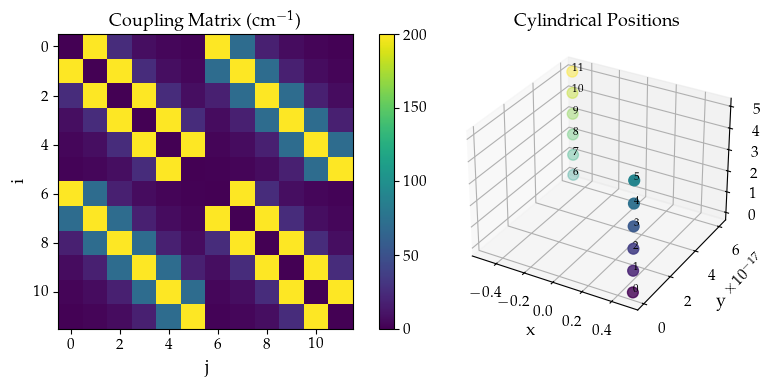

In [15]:
### Visualization: Coupling matrix heatmap & 3D positions
fig = plt.figure(figsize=(12,4))

# Coupling matrix heatmap
ax1 = fig.add_subplot(1,2,1)
im = ax1.imshow(cyl1.coupling_matrix_cm, cmap='viridis')
ax1.set_title("Coupling Matrix (cm$^{-1}$)")
ax1.set_xlabel("j")
ax1.set_ylabel("i")
plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)

# 3D positions
ax2 = fig.add_subplot(1,2,2, projection='3d')
pos = cyl1._positions
ax2.scatter(pos[:,0], pos[:,1], pos[:,2], c=np.arange(len(pos)), cmap='viridis', s=60)
for idx, (x,y,z) in enumerate(pos):
    ax2.text(x, y, z, f"{idx}", fontsize=8)
ax2.set_title("Cylindrical Positions")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
save_fig(fig, custom_dir / "cylindrical_positions")

[PosixPath('/home/leopold/Projects/Master_thesis/figures/figures_from_python/tests/test_N_atoms_geometry/eigen_spectrum_single_excitation.png')]

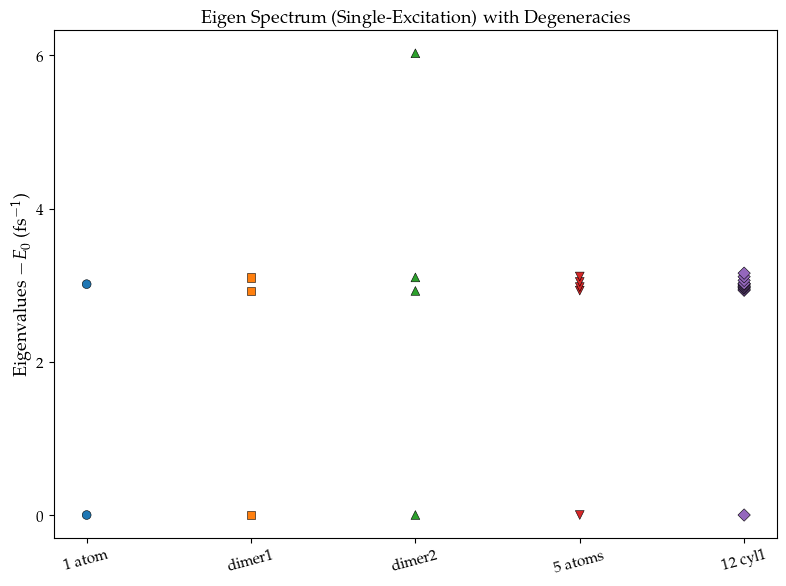

In [16]:
### 5. Energy spectrum comparison plot (eigenvalues with degeneracy)
# Assemble systems in an ordered mapping for automatic iteration
systems_map = {
    "1 atom": single,
    "dimer1": dimer1,
    "dimer2": dimer2,
    "5 atoms": four_at,
    "12 cyl1": cyl1,
}

# Group nearly-equal eigenvalues (degeneracy) helper
def group_levels(evals: np.ndarray, atol: float = 1e-10):
    vals_sorted = np.sort(evals)
    uniq = []
    counts = []
    for e in vals_sorted:
        if not uniq or abs(e - uniq[-1]) > atol:
            uniq.append(e)
            counts.append(1)
        else:
            counts[-1] += 1
    return np.array(uniq), np.array(counts)

plt.figure()
handles = []
for x, (label, sys) in enumerate(systems_map.items()):
    evals = sys.eigenstates[0]
    evals_shift = evals - evals.min()  # shift so ground level = 0
    uniq, counts = group_levels(evals_shift)

    color     = COLORS[x % len(COLORS)]
    marker    = MARKERS[x % len(MARKERS)]

    # Marker size encodes degeneracy
    sizes = 40 + 70*(counts-1)  # base size + additive per extra state
    plt.scatter(
        np.full_like(uniq, x, dtype=float),
        uniq,
        s=sizes,
        color=color,
        marker=marker,
        edgecolors='k',
        linewidths=0.4,
        label=label,
        zorder=3,
    )

    # Annotate degeneracy if >1; small horizontal jitter for readability
    for u, cnt in zip(uniq, counts):
        if cnt > 1:
            plt.text(x + 0.08, u, f"×{cnt}", va='center', ha='left', fontsize=8)

plt.ylabel(r'Eigenvalues $- E_0$ (fs$^{-1}$)')
plt.xticks(range(len(systems_map)), list(systems_map.keys()), rotation=15)
plt.title('Eigen Spectrum (Single-Excitation) with Degeneracies')
plt.legend(handles=handles, frameon=False, ncol=len(systems_map))
save_fig(plt.gcf(), custom_dir / "eigen_spectrum_single_excitation")


=== Cylindrical Geometry (30 atoms) ===
n_atoms: 30
frequencies (cm^-1): [16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0]
dip moments: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
dipole operator in eigenbasis: [[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

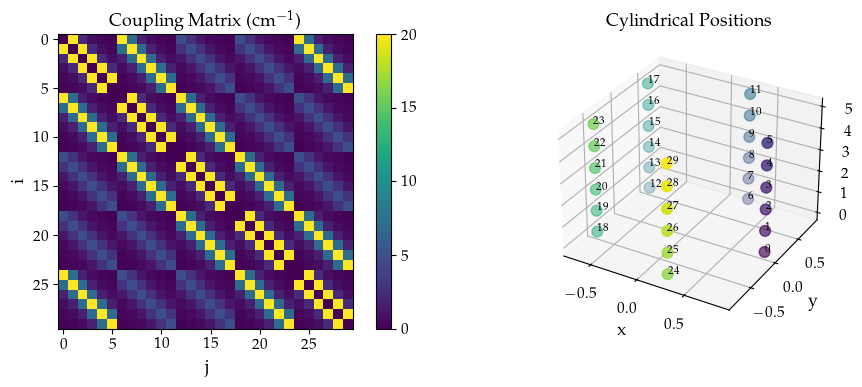

[PosixPath('/home/leopold/Projects/Master_thesis/figures/figures_from_python/tests/test_N_atoms_geometry/eigen_spectrum_single_excitation_30_at.png')]

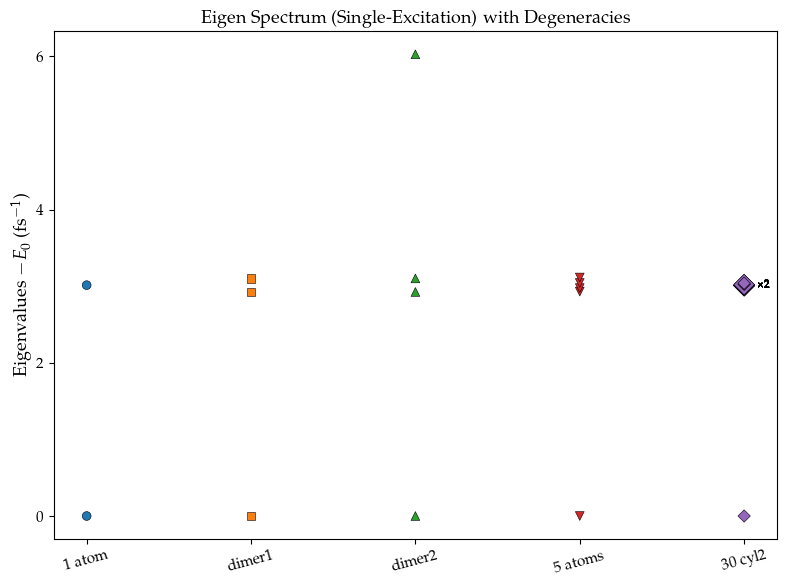

In [17]:
### 4. 12-atom cylindrical geometry (2 chains x 3 rings) with 1/r^3 couplings
cyl2 = AtomicSystem(
    n_atoms=30,
    n_chains=5,  # 6 rings, 5 chains
    frequencies_cm=[16000.0]*30,
    dip_moments=[1.0]*30,
    max_excitation=1,
    coupling_cm=20.0,  # used as default prefactor if not specified
)
# Place on cylinder and build couplings
show_basic_info("Cylindrical Geometry (30 atoms)", cyl2)
print("Positions (arbitrary units):\n", cyl2._positions)
mat = cyl2.coupling_matrix_cm
print("Coupling matrix (cm^-1):\n", mat)

### Visualization: Coupling matrix heatmap & 3D positions
fig = plt.figure(figsize=(12,4))

# Coupling matrix heatmap
ax1 = fig.add_subplot(1,2,1)
im = ax1.imshow(mat, cmap='viridis')
ax1.set_title("Coupling Matrix (cm$^{-1}$)")
ax1.set_xlabel("j")
ax1.set_ylabel("i")
plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)

# 3D positions
ax2 = fig.add_subplot(1,2,2, projection='3d')
pos = cyl2._positions
ax2.scatter(pos[:,0], pos[:,1], pos[:,2], c=np.arange(len(pos)), cmap='viridis', s=60)
for idx, (x,y,z) in enumerate(pos):
    ax2.text(x, y, z, f"{idx}", fontsize=8)
ax2.set_title("Cylindrical Positions")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
plt.tight_layout()
save_fig(fig, custom_dir / "cylindrical_positions_30_at")
plt.show()

### 5. Energy spectrum comparison plot (eigenvalues with degeneracy)

# DEGENERACY-AWARE PLOT (auto-configured: no manual systems/labels/colors lists)

# Assemble systems in an ordered mapping for automatic iteration
systems_map = {
    "1 atom": single,
    "dimer1": dimer1,
    "dimer2": dimer2,
    "5 atoms": four_at,
    "30 cyl2": cyl2,
}

# Group nearly-equal eigenvalues (degeneracy) helper
def group_levels(evals: np.ndarray, atol: float = 1e-10):
    vals_sorted = np.sort(evals)
    uniq = []
    counts = []
    for e in vals_sorted:
        if not uniq or abs(e - uniq[-1]) > atol:
            uniq.append(e)
            counts.append(1)
        else:
            counts[-1] += 1
    return np.array(uniq), np.array(counts)

plt.figure()

handles = []
for x, (label, sys) in enumerate(systems_map.items()):
    evals = sys.eigenstates[0]
    evals_shift = evals - evals.min()  # shift so ground level = 0
    uniq, counts = group_levels(evals_shift)

    color     = COLORS[x % len(COLORS)]
    marker    = MARKERS[x % len(MARKERS)]

    # Marker size encodes degeneracy
    sizes = 40 + 70*(counts-1)  # base size + additive per extra state
    plt.scatter(
        np.full_like(uniq, x, dtype=float),
        uniq,
        s=sizes,
        color=color,
        marker=marker,
        edgecolors='k',
        linewidths=0.4,
        label=label,
        zorder=3,
    )

    # Annotate degeneracy if >1; small horizontal jitter for readability
    for u, cnt in zip(uniq, counts):
        if cnt > 1:
            plt.text(x + 0.08, u, f"×{cnt}", va='center', ha='left', fontsize=8)

plt.ylabel(r'Eigenvalues $- E_0$ (fs$^{-1}$)')
plt.xticks(range(len(systems_map)), list(systems_map.keys()), rotation=15)
plt.title('Eigen Spectrum (Single-Excitation) with Degeneracies')
plt.legend(handles=handles, frameon=False, ncol=len(systems_map))
plt.tight_layout()
save_fig(plt.gcf(), custom_dir / "eigen_spectrum_single_excitation_30_at")